In [3]:
import torchaudio
import torch as tr
import librosa
import librosa.beat as beat
import numpy as np
import matplotlib.pyplot as plt
import nnAudio.Spectrogram
import seaborn as sns

In [4]:
signal, sr = librosa.load("resources/music/space_oddity.mp3",sr=44100)

/home/physe/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [5]:
tempo, beats = beat.beat_track(y=signal, sr=sr)

In [6]:
tempo

139.6748310810811

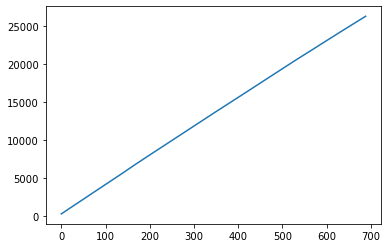

In [7]:
plt.plot(beats)

In [8]:
cqt = nnAudio.Spectrogram.CQT(sr=sr, n_bins=50,)

CQT kernels created, time used = 0.0554 seconds


In [9]:
cqt_signal = cqt(tr.tensor(signal, requires_grad=True))

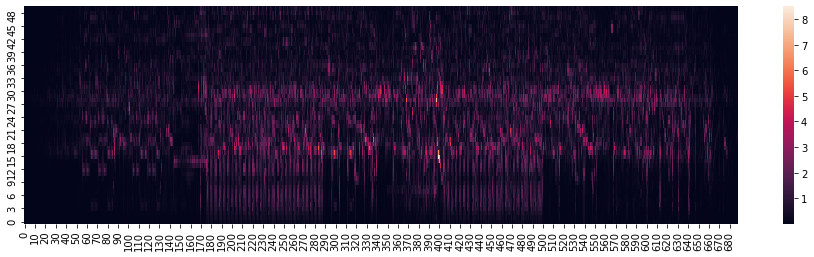

In [10]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy()[:,beats])
ax.invert_yaxis()

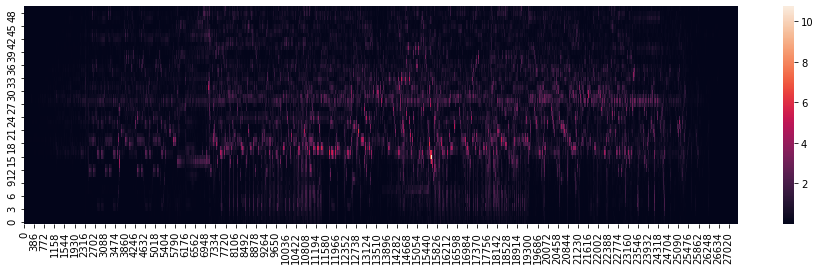

In [11]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy())
ax.invert_yaxis()

In [12]:
cqt_signal.squeeze().detach().numpy()[:,beats]

array([[0.00194639, 0.00185701, 0.00388515, ..., 0.00379321, 0.00218238,
        0.01166966],
       [0.00095037, 0.0015046 , 0.00282262, ..., 0.00646067, 0.00524537,
        0.00902159],
       [0.0010207 , 0.00054318, 0.00182301, ..., 0.0046185 , 0.00650307,
        0.00716912],
       ...,
       [0.00497339, 0.00370865, 0.01570993, ..., 0.01910728, 0.02253059,
        0.00235168],
       [0.00142051, 0.00249622, 0.00728312, ..., 0.01230575, 0.0319863 ,
        0.00624669],
       [0.00211442, 0.00073911, 0.00108192, ..., 0.01985762, 0.02850466,
        0.00945202]], dtype=float32)

In [13]:
beats_time = librosa.frames_to_time(beats, sr=sr)

In [14]:
(beats_time[-1] - beats_time[0])/ len(beats_time)

0.43669691195297666

In [15]:
tempo

139.6748310810811

[[1.35211806e-08 2.63208335e-07 5.44642603e-07 ... 2.23114621e-05
  1.17410884e-04 5.11351449e-04]
 [2.17079883e-08 1.26898030e-07 5.84096142e-07 ... 1.09083112e-02
  1.66012533e-02 8.73680040e-03]
 [1.55480802e-08 4.34320633e-08 1.97607520e-07 ... 2.94625126e-02
  5.97497858e-02 2.45941002e-02]
 ...
 [6.56779378e-08 7.63138672e-08 8.34171630e-08 ... 4.13370572e-07
  6.39665700e-07 6.03646583e-07]
 [3.20141624e-09 2.96035618e-09 2.23319385e-09 ... 1.89671234e-09
  2.32296271e-09 2.46806398e-09]
 [3.00725134e-09 3.31207195e-09 2.85701240e-09 ... 1.62245339e-09
  1.46469992e-09 1.53221036e-09]]


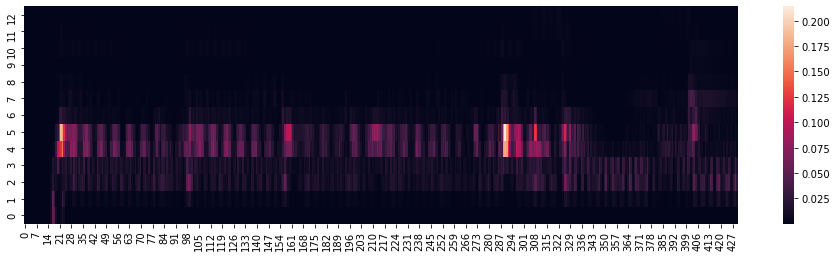

In [16]:
mel = librosa.feature.melspectrogram(signal[:44100*5], sr=sr, **{'n_mels':128})
print(mel)
plt.figure(figsize=(16,4))
ax = sns.heatmap(mel[:13,:])
ax.invert_yaxis()

In [17]:
cqt_librosa = librosa.core.constantq.cqt(signal,sr=sr,)

In [18]:
librosa.mel_frequencies(n_mels=128, fmin=0.0, fmax=44100.0, htk=False)

array([0.00000000e+00, 3.67844382e+01, 7.35688764e+01, 1.10353315e+02,
       1.47137753e+02, 1.83922191e+02, 2.20706629e+02, 2.57491067e+02,
       2.94275506e+02, 3.31059944e+02, 3.67844382e+02, 4.04628820e+02,
       4.41413259e+02, 4.78197697e+02, 5.14982135e+02, 5.51766573e+02,
       5.88551011e+02, 6.25335450e+02, 6.62119888e+02, 6.98904326e+02,
       7.35688764e+02, 7.72473202e+02, 8.09257641e+02, 8.46042079e+02,
       8.82826517e+02, 9.19610955e+02, 9.56395394e+02, 9.93179832e+02,
       1.03138386e+03, 1.07126092e+03, 1.11267978e+03, 1.15570003e+03,
       1.20038361e+03, 1.24679482e+03, 1.29500046e+03, 1.34506990e+03,
       1.39707521e+03, 1.45109123e+03, 1.50719571e+03, 1.56546939e+03,
       1.62599615e+03, 1.68886309e+03, 1.75416070e+03, 1.82198295e+03,
       1.89242746e+03, 1.96559561e+03, 2.04159270e+03, 2.12052812e+03,
       2.20251547e+03, 2.28767276e+03, 2.37612253e+03, 2.46799209e+03,
       2.56341367e+03, 2.66252459e+03, 2.76546751e+03, 2.87239057e+03,
      

In [21]:
tempo, beats = librosa.beat.beat_track(signal, sr=sr, hop_length=600)
mfccs = librosa.feature.mfcc(y=signal,sr=sr,**{'n_fft':1200, 'win_length':1200, 'hop_length':600})

In [25]:
mfccs.shape

(20, 23375)

In [26]:
spec_cent = librosa.feature.spectral_centroid(signal, n_fft=1200, hop_length=600, win_length=1200)

In [27]:
spec_cent[:,beats]

array([[2070.50238016, 2704.49775659, 2513.59611322, 2130.71588098,
        2591.18612509, 2227.3411727 , 2424.86776912, 1854.98756743,
        1872.57072686, 2143.57112446, 1758.88710884, 2028.70432283,
        1424.86278225, 1797.29188007, 1943.90775216, 2010.82928665,
        2011.43652616, 2455.45055719, 1408.89915918, 1887.07996395,
        1667.71743926, 1363.82168213, 1755.35741239, 1755.21438822,
        2370.39366031, 1661.33849647,  858.31199939, 2108.53076637,
        1744.7467161 , 1739.49433747, 2155.86695704, 1552.76041707,
        1733.33911564, 1982.34917526, 1052.53983245, 1921.86654181,
        1093.00199577,  932.32151194, 1349.03140733, 1504.10805601,
        1894.6292546 , 1803.17909897,  846.6468217 , 1942.0805016 ,
        1133.1490416 , 1222.41004558, 1475.41558412, 1027.77813215,
        1775.29878627, 2118.04004447, 1003.7226605 , 1912.87302052,
        1274.01497117, 1060.26676937, 1457.72745255, 1671.03671422,
        2064.00753313, 1727.33672756,  506.18450

In [28]:
beats

array([  244,   276,   309,   342,   374,   407,   440,   471,   502,
         535,   569,   603,   636,   670,   704,   737,   770,   804,
         838,   872,   906,   939,   973,  1006,  1037,  1070,  1104,
        1138,  1172,  1206,  1238,  1270,  1303,  1336,  1369,  1403,
        1436,  1469,  1502,  1533,  1565,  1599,  1633,  1667,  1700,
        1732,  1763,  1795,  1828,  1860,  1894,  1928,  1959,  1991,
        2023,  2057,  2089,  2122,  2156,  2190,  2224,  2256,  2289,
        2323,  2355,  2388,  2422,  2455,  2487,  2521,  2551,  2584,
        2614,  2650,  2682,  2715,  2749,  2782,  2814,  2848,  2881,
        2913,  2946,  2980,  3013,  3045,  3077,  3110,  3143,  3178,
        3211,  3243,  3279,  3310,  3341,  3377,  3409,  3443,  3477,
        3511,  3544,  3577,  3608,  3641,  3672,  3704,  3740,  3774,
        3807,  3839,  3871,  3901,  3934,  3967,  4000,  4034,  4066,
        4098,  4130,  4164,  4197,  4231,  4265,  4298,  4331,  4364,
        4396,  4427,

In [201]:
318/60*139

736.6999999999999

In [30]:
# There are 690 detected points, and if we consider the beginning and the end of the music, there will be no 
# more than 750 points. That means 750 pictures are enough. The program generates a picture for every 0.1 
# seconds (10 points a second), it approximately generates 3000 pictures in total. Hence, we need to select 
# 750 points over 3000 points as well as compute the difference between the two adjacent spectral centroid 
# points. Then, we need to strengthen the visual difference between two pictures to make people feel that the
# picture is rapidly changing.

In [71]:
ones_matrix = np.ones((64,64,3))

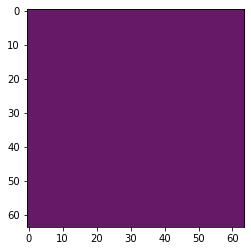

In [86]:
plt_matrix = np.copy(ones_matrix)
plt_matrix[:,:,0] = ones_matrix[:,:,0]*0.4
plt_matrix[:,:,1] = ones_matrix[:,:,1]*0.1
plt_matrix[:,:,2] = ones_matrix[:,:,2]*0.4
plt_matrix=plt_matrix.astype(np.float32)
plt.imshow(plt_matrix)

In [87]:
begin_img = np.copy(ones_matrix)
begin_img[:,:,0] = ones_matrix[:,:,0]*0.2
begin_img[:,:,1] = ones_matrix[:,:,1]*0.5
begin_img[:,:,2] = ones_matrix[:,:,2]*0.6

end_img = np.copy(ones_matrix)
end_img[:,:,0] = ones_matrix[:,:,0]*0.4
end_img[:,:,1] = ones_matrix[:,:,1]*0.1
end_img[:,:,2] = ones_matrix[:,:,2]*0.4

In [89]:
(0.4-0.2)/690

0.0002898550724637681